In [1]:
# import packages
import pandas as pd # manipulating the data purpose
import csv
import os
import numpy as np
from sklearn.model_selection import train_test_split # Split test/train data randomly
from sklearn.feature_extraction.text import CountVectorizer # Convert a collection of text documents to a matrix of token counts
from sklearn.naive_bayes import MultinomialNB # add classifier for classification of words

In [2]:
def convert_src_to_csv(input_directory, output_csv, spam_classification_number):
    # List to hold all rows of data
    data_rows = []

    # Iterate over all files in the input directory
    for filename in os.listdir(input_directory):
        file_path = os.path.join(input_directory, filename)
        
        # Only process if it's a file
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                file_content = file.read().strip()
                # Replace newlines with spaces to have one constant text
                file_content_single_line = file_content.replace('\n', ' ')
                file_content_no_sign = file_content_single_line.replace(',', ' ')
                # Append file content as a row in data_rows
                data_rows.append([file_content_no_sign, spam_classification_number])

    # Write all data to the CSV file
    with open(output_csv, 'w', newline='', encoding='utf-8') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(['text', 'label'])  # Write header
        writer.writerows(data_rows)

In [3]:
# Define input directory containing the files and output CSV file path
input_directory_non_spam = './srcdata/easy_ham'
input_directory_spam = './srcdata/spam'
output_csv_non_spam = 'output_emails_non_spam.csv'
output_csv_spam = 'output_emails_spam.csv'

# Call the function to process files and create CSV for NON SPAM data (HAM)
convert_src_to_csv(input_directory_non_spam, output_csv_non_spam, 0)

# Call the function to process files and create CSV for SPAM data (HAM)
convert_src_to_csv(input_directory_spam , output_csv_spam, 1)

In [4]:
# import data
file_spam = pd.read_csv("output_emails_spam.csv")
file_ham = pd.read_csv("output_emails_non_spam.csv")
spam_df = pd.concat([file_spam, file_ham], ignore_index=True) # merging spam and ham

C:\Users\lzloc\AppData\Local\Temp\ipykernel_13328\2967893293.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.countplot(x = ['ham']*len(file_ham) + ['spam']*len(file_spam), palette=colors, legend=False)


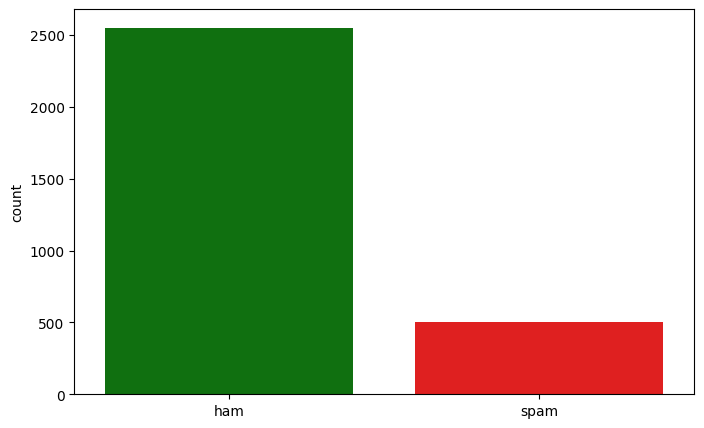

In [41]:
# Show how many spam / ham emails is in given data
import matplotlib.pyplot as plt
import seaborn as sea
labels = ['ham', 'spam']
colors = ['green', 'red']
plt.figure(figsize=(8, 5))
sea.countplot(x = ['ham']*len(file_ham) + ['spam']*len(file_spam), palette=colors, legend=False)
plt.show()

In [36]:
# inspect data
spam_df.head()

,text,label
0,mv 1 00001.bfc8d64d12b325ff385cca8d07b84288 mv...,1
1,From 12a1mailbot1@web.de Thu Aug 22 13:17:22 ...,1
2,From ilug-admin@linux.ie Thu Aug 22 13:27:39 ...,1
3,From sabrina@mx3.1premio.com Thu Aug 22 14:44...,1
4,From wsup@playful.com Thu Aug 22 16:17:00 200...,1


In [20]:
# inspect data
spam_df.shape

(3052, 2)

In [21]:
# goup by category. 0 - no spam, 1 - spam
spam_df.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
0      2551   2550  From razor-users-admin@lists.sourceforge.net  ...    2
1       501    497  Received: from b.smtp-out.sonic.net (b.smtp-ou...    2

In [22]:
# create train/test split w proporcji 25%
x_train, x_test, y_train, y_test = train_test_split(spam_df.text, spam_df.label, test_size = 0.25)

In [23]:
# check training data
x_train.head()

1734    From exmh-workers-admin@redhat.com  Wed Oct  2...
2515    From rssfeeds@jmason.org  Thu Sep 26 11:03:04 ...
1383    From fork-admin@xent.com  Mon Sep 30 19:59:00 ...
1177    From fork-admin@xent.com  Wed Sep 18 14:06:40 ...
490     From crackmice-admin@crackmice.com  Thu Sep 26...
Name: text, dtype: object

In [24]:
# check training data
x_train.describe()

count                                                  2289
unique                                                 2285
top       Received: from qrq.cc.ntu.edu.tw (giga.tw.free...
freq                                                      2
Name: text, dtype: object

In [25]:
# find key words and store data as matrix of words
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values) # all text transforming to matrix of words

In [26]:
# see matrix shape
x_train_count

<2289x73199 sparse matrix of type '<class 'numpy.int64'>'
	with 574919 stored elements in Compressed Sparse Row format>

In [27]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [3, 0, 1, ..., 0, 0, 0],
       [3, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [28]:
# train model basis on word matrix and given information spam - 1 , not spam - 0
model = MultinomialNB() # word counts for text classification
model.fit(x_train_count, y_train)

MultinomialNB()

In [29]:
# test trained model on my custom NON SPAM email message
email_ham = ["hey lets have a beer together today. Are you in?"]
email_ham_count = cv.transform(email_ham)
model.predict(email_ham_count)

array([0], dtype=int64)

In [30]:
# test trained model on my custom SPAM email message
email_spam = ["reward click now you will be reach"]
email_spam_count = cv.transform(email_spam)
model.predict(email_spam_count)

array([1], dtype=int64)

In [31]:
# test model accuracy
x_test_count = cv.transform(x_test)
model.score(x_test_count, y_test)

0.9672346002621232

In [32]:
x_test.head
#from sklearn.metrics import confusion_matrix
#y_pred = model.predict(x_test)
#cm = confusion_matrix(y_test, y_pred)
#cm_matrix = confusion_matrix(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 #index=['Predict Positive:1', 'Predict Negative:0'])

<bound method NDFrame.head of 907     From fork-admin@xent.com  Wed Aug 28 18:17:25 ...
621     From ilug-admin@linux.ie  Mon Sep  2 13:13:12 ...
2740    From rssfeeds@jmason.org  Tue Oct  1 10:37:13 ...
1336    From fork-admin@xent.com  Wed Sep 25 10:24:49 ...
1080    From fork-admin@xent.com  Mon Sep  9 19:27:41 ...
                              ...                        
2066    From spamassassin-talk-admin@lists.sourceforge...
2856    From rssfeeds@jmason.org  Fri Oct  4 11:01:55 ...
556     From ilug-admin@linux.ie  Fri Aug 23 11:07:57 ...
1852    From rpm-list-admin@freshrpms.net  Mon Oct  7 ...
1082    From fork-admin@xent.com  Mon Sep  9 19:27:44 ...
Name: text, Length: 763, dtype: object>